In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('//content/drive/MyDrive/creditcard.csv')


In [8]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [9]:
data.shape

(284807, 31)

In [10]:

# Check for and handle missing values
data = data.dropna(subset=['Class'])
X = data.drop('Class', axis=1)
y = data['Class']

# Handle missing values in features
X = X.fillna(X.mean())

# Preprocess the data
X = X.values
y = y.values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import RandomOverSampler
# Random Oversampling
X_train = x_train
y_train = y_train
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)


In [13]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The ADASYN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

borderline_smote = BorderlineSMOTE(random_state=42)
X_borderline, y_borderline = borderline_smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The BorderlineSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# KmeansSMOTE
from imblearn.over_sampling import KMeansSMOTE

kmeans_smote = KMeansSMOTE(random_state=42, cluster_balance_threshold=0)

X_kmeans, y_kmeans = kmeans_smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The KMeansSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# SVMSMOTE
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(random_state=42)
X_svmsmote, y_svmsmote = svmsmote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SVMSMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [14]:
class RNNModel(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(RNNModel, self).__init__()
            self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
            self.fc = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            # Reshape input to (batch_size, sequence_length, input_size)
            x = x.view(x.size(0), 1, -1)  # Reshape input to have sequence length of 1

            out, _ = self.rnn(x)
            out = self.fc(out[:, -1, :])  # Use the last time step
            return torch.sigmoid(out)

In [15]:
class LSTMModel(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(LSTMModel, self).__init__()
            self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
            self.fc = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            # Reshape input to (batch_size, sequence_length, input_size)
            x = x.view(x.size(0), 1, -1)  # Reshape input to have sequence length of 1
            out, (hn, _) = self.lstm(x)
            out = self.fc(hn[-1])  # Pass the last hidden state through the linear layer

            # Reshape to match target size (batch_size, output_size)
            out = out.view(-1, 1)  # Reshape to (num_samples, 1)
            return torch.sigmoid(out) # apply sigmoid function

In [16]:
# TRAINING FUNCTION
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


In [17]:
def prepare_dataloader(X, y, batch_size=32):
    # Convert X to a tensor
    X_tensor = torch.tensor(X, dtype=torch.float32)

    # Convert y to a tensor and ensure dimensions match
    y = np.array(y)  # Ensure it's a NumPy array
    if len(y.shape) == 1:  # If y is 1D
        y = y.reshape(-1, 1)  # Reshape to match samples in X

    y_tensor = torch.tensor(y, dtype=torch.float32)

    # Print shapes for debugging
    print("X_tensor shape:", X_tensor.shape)
    print("y_tensor shape:", y_tensor.shape)

    # Combine tensors into a dataset and create a DataLoader
    dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return dataloader


In [18]:
# EVALUTION FUNCTION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, test_loader):
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            y_pred.extend(outputs.numpy())
            y_true.extend(y_batch.numpy())
    y_pred = (np.array(y_pred) > 0.5).astype(int)
    return accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def agss(X_train, y_train, n_synthetic_samples):
    """
    Attribute Guided Synthetic Sampling (AGSS) for oversampling minority class.

    Args:
        X_train: Training data features.
        y_train: Training data labels.
        n_synthetic_samples: Number of synthetic samples to generate.

    Returns:
        X_agss: Oversampled data features.
        y_agss: Oversampled data labels.
    """
    # Step 1: Cluster minority class
    X_minority = X_train[y_train == 1]  # Extract minority class samples
    clustering = DBSCAN(eps=0.8, min_samples=3).fit(X_minority) # Adjust eps and min_samples

    # Check if any clusters were found (excluding noise points labeled -1)
    if len(set(clustering.labels_)) <= 1:  # Only noise points or no clusters
        print("No clusters found by DBSCAN. Returning original data.")
        return X_train, y_train  # Return original data if no clusters found

    clusters = {label: X_minority[clustering.labels_ == label]
                for label in set(clustering.labels_) if label != -1}

    # Step 2: Generate synthetic samples
    synthetic_samples = []
    for cluster_points in clusters.values():
        neighbors = NearestNeighbors(n_neighbors=3).fit(cluster_points)
        _, indices = neighbors.kneighbors(cluster_points)

        for i in range(n_synthetic_samples // len(clusters)):
            base_point = cluster_points[np.random.choice(range(len(cluster_points)))]
            neighbor_point = cluster_points[np.random.choice(indices.flatten())]

            # Generate synthetic sample along gradient
            direction = neighbor_point - base_point
            step_size = np.random.uniform(0.1, 1.0)
            new_sample = base_point + step_size * direction

            # Add curvature transformation to all features
            angle = np.random.uniform(-np.pi / 4, np.pi / 4)
            new_sample = new_sample * np.cos(angle) + np.random.rand(new_sample.shape[0]) * np.sin(angle)

            synthetic_samples.append(new_sample) # No need to flatten


    X_oversampled = np.array(synthetic_samples)

    # Check for empty synthetic samples
    if X_oversampled.size == 0:  # Handle cases where the array is empty
        print("No synthetic samples generated. Returning original data.")
        return X_train, y_train

    # Combine original and synthetic data
    X_agss = np.vstack((X_train, X_oversampled))
    y_agss = np.hstack((y_train, np.ones(len(synthetic_samples), dtype=int)))

    return X_agss, y_agss

In [ ]:
# Hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
epochs = 10
learning_rate = 0.001

# Initialize Models
rnn = RNNModel(input_size, hidden_size, output_size)
lstm = LSTMModel(input_size, hidden_size, output_size)

criterion = nn.BCELoss()
optimizer_rnn = torch.optim.Adam(rnn.parameters(), lr=learning_rate)
optimizer_lstm = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

X_minority = X_train[y_train == 1]  # Get minority class samples
n_synthetic_samples = len(X_train[y_train == 0]) - len(X_train[y_train == 1])


sampling_methods = {
    'Random Oversampling': (X_ros, y_ros),
    'SMOTE': (X_smote, y_smote),
    'ADASYN': (X_adasyn, y_adasyn),
     #'AGSS': agss(X_train, y_train, len(X_train[y_train == 0]) - len(X_train[y_train == 1]), eps=0.3, min_samples=3)  # Adjust values
    'AGSS': agss(X_train, y_train, len(X_train[y_train == 0]) - len(X_train[y_train == 1])),  # Call agss here
    'BorderlineSMOTE': (X_borderline, y_borderline),
    'KmeansSMOTE': (X_kmeans, y_kmeans),
    'SVMSMOTE': (X_svmsmote, y_svmsmote)
}

'''
sampling_methods = {
    'Random Oversampling': (X_ros, y_ros),
    'SMOTE': (X_smote, y_smote),
    'ADASYN': (X_adasyn, y_adasyn),
    'BorderlineSMOTE': (X_borderline_smote, y_borderline_smote),
    'KMeansSMOTE': (X_kmeans, y_kmeans),  # Changed from X_kmeans_smote, y_kmeans_smote
    'SVMSMOTE': (X_svm_smote, y_svm_smote),
    'AGSS': agss(X_train, y_train, len(X_train[y_train == 0]) - len(X_train[y_train == 1]))
}
'''
results = {}

for method, (X_sampled, y_sampled) in sampling_methods.items():
    train_loader = prepare_dataloader(X_sampled, y_sampled)
    test_loader = prepare_dataloader(X_test, y_test)

    print(f"Training RNN with {method}...")
    train_model(rnn, train_loader, criterion, optimizer_rnn, epochs)
    rnn_results = evaluate_model(rnn, test_loader)

    print(f"Training LSTM with {method}...")
    train_model(lstm, train_loader, criterion, optimizer_lstm, epochs)
    lstm_results = evaluate_model(lstm, test_loader)

    results[method] = {'RNN': rnn_results, 'LSTM': lstm_results}

X_tensor shape: torch.Size([454902, 30])
y_tensor shape: torch.Size([454902, 1])
X_tensor shape: torch.Size([56962, 30])
y_tensor shape: torch.Size([56962, 1])
Training RNN with Random Oversampling...
Epoch 1, Loss: 0.0008745776140131056
Epoch 2, Loss: 0.0008547771722078323
Epoch 3, Loss: 0.00043318208190612495
Epoch 4, Loss: 3.8320781641232315e-06
Epoch 5, Loss: 3.0996565328678116e-05
Epoch 6, Loss: 4.180297310085734e-06
Epoch 7, Loss: 0.0001387267984682694
Epoch 8, Loss: 5.622702883556485e-05
Epoch 9, Loss: 1.8830589397111908e-05
Epoch 10, Loss: 7.978100620675832e-05
Training LSTM with Random Oversampling...
Epoch 1, Loss: 9.442842565476894e-05
Epoch 2, Loss: 9.428602061234415e-05
Epoch 3, Loss: 0.00011490313772810623
Epoch 4, Loss: 0.00019535866158548743
Epoch 5, Loss: 2.7655378289637156e-05
Epoch 6, Loss: 4.186631940683583e-06
Epoch 7, Loss: 9.13233725441387e-06
Epoch 8, Loss: 7.099081813066732e-06
Epoch 9, Loss: 1.730134681565687e-05
Epoch 10, Loss: 1.335874549113214e-05
X_tensor 

In [ ]:
# Print results for RNN
print("RNN Results:")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
print("Sampling Method | Accuracy | Precision | Recall | F1-score |")
print("----------------------------------------------------------")
# Get the sampling methods from the 'results' dictionary
# Assuming the 'results' dictionary structure is consistent
# Replace 'results' with 'results_rnn' if you have a separate dictionary for RNN results
sampling_methods_rnn = list(results.keys())  # or list(results_rnn.keys()) if you have a separate dictionary

for method in sampling_methods_rnn:
    values = results[method]['RNN']  # Accessing RNN results from the main 'results' dictionary
    # If you have 'results_rnn', replace the line above with: values = results_rnn[method]
    print(f"{method:<16} | {values[0]:.4f} | {values[1]:.4f} | {values[2]:.4f} | {values[3]:.4f} | ")

print()
print("LSTM Results:")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
print("Sampling Method | Accuracy | Precision | Recall | F1-score |")
print("----------------------------------------------------------")
for method in sampling_methods_rnn:
    values = results[method]['LSTM']  # Accessing RNN results from the main 'results' dictionary
    # If you have 'results_rnn', replace the line above with: values = results_rnn[method]
    print(f"{method:<16} | {values[0]:.4f} | {values[1]:.4f} | {values[2]:.4f} | {values[3]:.4f} | ")

RNN Results:
Sampling Method | Accuracy | Precision | Recall | F1-score |
----------------------------------------------------------
Random Oversampling | 0.9993 | 0.7545 | 0.8469 | 0.7981 | 
SMOTE            | 0.9987 | 0.5764 | 0.8469 | 0.6860 | 
ADASYN           | 0.9987 | 0.5874 | 0.8571 | 0.6971 | 
AGSS             | 0.9994 | 0.8298 | 0.7959 | 0.8125 | 
BorderlineSMOTE  | 0.9995 | 0.8526 | 0.8265 | 0.8394 | 
KmeansSMOTE      | 0.9993 | 0.7959 | 0.7959 | 0.7959 | 
SVMSMOTE         | 0.9993 | 0.7900 | 0.8061 | 0.7980 | 

LSTM Results:
Sampling Method | Accuracy | Precision | Recall | F1-score |
----------------------------------------------------------
Random Oversampling | 0.9993 | 0.7822 | 0.8061 | 0.7940 | 
SMOTE            | 0.9991 | 0.7054 | 0.8061 | 0.7524 | 
ADASYN           | 0.9993 | 0.7642 | 0.8265 | 0.7941 | 
AGSS             | 0.9995 | 0.9146 | 0.7653 | 0.8333 | 
BorderlineSMOTE  | 0.9993 | 0.8409 | 0.7551 | 0.7957 | 
KmeansSMOTE      | 0.9993 | 0.7938 | 0.7857 | 0.7897 |

In [ ]:
# Assuming 'results' dictionary contains the evaluation results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
sampling_methods = list(results.keys())

# Print results in a table-like format
print("Sampling Method | Model | Accuracy | Precision | Recall | F1-score")
print("---------------------------------------------------------------------")
for method in sampling_methods:
    for model in ['RNN', 'LSTM']:
        values = results[method][model]
        print(f"{method:<16} | {model:<5} | {values[0]:.4f} | {values[1]:.4f} | {values[2]:.4f} | {values[3]:.4f}")

Sampling Method | Model | Accuracy | Precision | Recall | F1-score
---------------------------------------------------------------------
Random Oversampling | RNN   | 0.9993 | 0.7545 | 0.8469 | 0.7981
Random Oversampling | LSTM  | 0.9993 | 0.7822 | 0.8061 | 0.7940
SMOTE            | RNN   | 0.9987 | 0.5764 | 0.8469 | 0.6860
SMOTE            | LSTM  | 0.9991 | 0.7054 | 0.8061 | 0.7524
ADASYN           | RNN   | 0.9987 | 0.5874 | 0.8571 | 0.6971
ADASYN           | LSTM  | 0.9993 | 0.7642 | 0.8265 | 0.7941
AGSS             | RNN   | 0.9994 | 0.8298 | 0.7959 | 0.8125
AGSS             | LSTM  | 0.9995 | 0.9146 | 0.7653 | 0.8333
BorderlineSMOTE  | RNN   | 0.9995 | 0.8526 | 0.8265 | 0.8394
BorderlineSMOTE  | LSTM  | 0.9993 | 0.8409 | 0.7551 | 0.7957
KmeansSMOTE      | RNN   | 0.9993 | 0.7959 | 0.7959 | 0.7959
KmeansSMOTE      | LSTM  | 0.9993 | 0.7938 | 0.7857 | 0.7897
SVMSMOTE         | RNN   | 0.9993 | 0.7900 | 0.8061 | 0.7980
SVMSMOTE         | LSTM  | 0.9994 | 0.8182 | 0.8265 | 0.8223


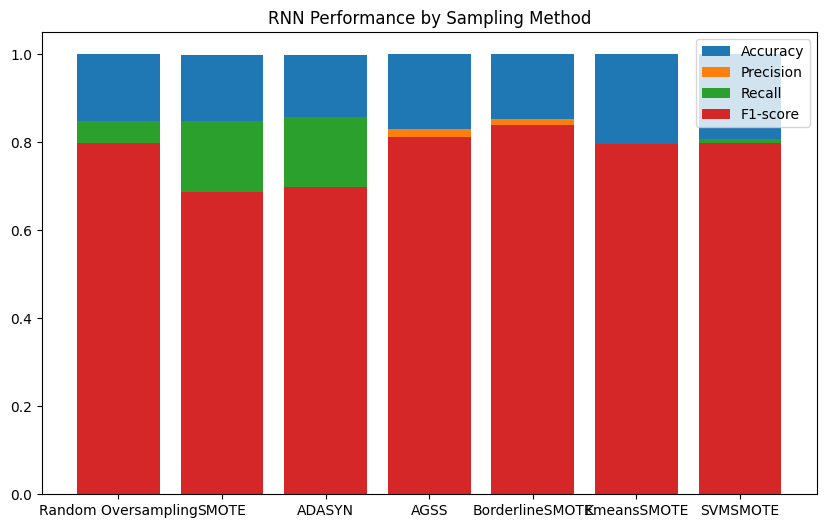

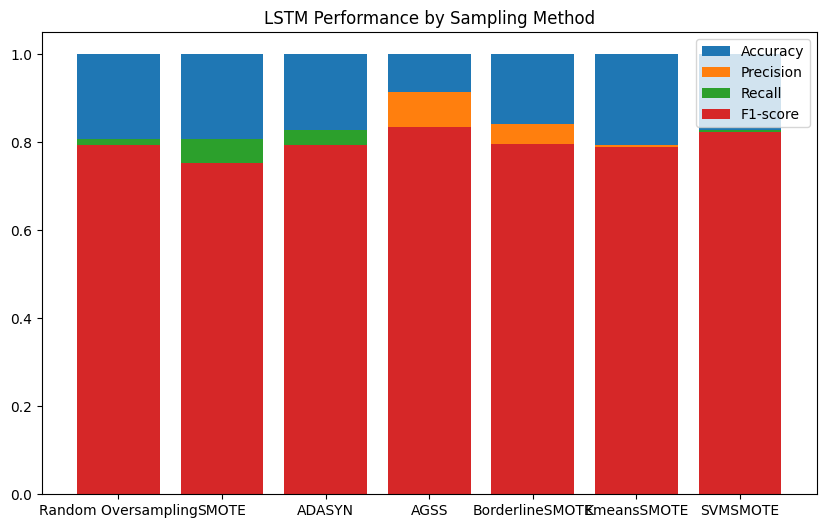

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Get the original keys from the results dictionary
# This ensures you're using the correct sampling methods
sampling_method_keys = list(results.keys())

for model in ['RNN', 'LSTM']:
    plt.figure(figsize=(10, 6))
    for metric_idx, metric in enumerate(metrics):
        # Iterate through the keys (sampling methods) and get the values
        values = [results[method][model][metric_idx] for method in sampling_method_keys]
        plt.bar(sampling_method_keys, values, label=metric)
    plt.title(f'{model} Performance by Sampling Method')
    plt.legend()
    plt.show()

In [21]:
!pip install torchmetrics==1.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [22]:
#1
def evaluate_model_with_agss(X_train_resampled, y_train_resampled, X_val, y_val):
    """
    Trains and evaluates the model on resampled training data and original validation data.

    Args:
        X_train_resampled: Resampled training data features.
        y_train_resampled: Resampled training data labels.
        X_val: Original validation data features.
        y_val: Original validation data labels.

    Returns:
        roc_auc: The ROC-AUC score on the validation set.
    """
    # Convert to tensors and prepare dataloaders
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_resampled).float(),
                                                   torch.tensor(y_train_resampled).float())
    val_dataset = torch.utils.data.TensorDataset(torch.tensor(X_val).float(),
                                                 torch.tensor(y_val).float())
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64)

    # Initialize and train model (using LSTMModel as an example, you can use RNNModel)
    # You might want to pass model hyperparameters to this function later for tuning the model itself
    model = LSTMModel(input_size=X_train_resampled.shape[1], hidden_size=64, output_size=1)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model (you can adjust the number of epochs)
    for epoch in range(50):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            preds = model(batch_x).squeeze().cpu().numpy()
            if preds.ndim == 0:
                all_preds.append(preds)
            else:
                all_preds.extend(preds)
            all_labels.extend(batch_y.cpu().numpy())

    # Calculate the evaluation metric (e.g., ROC-AUC)
    roc_auc = roc_auc_score(all_labels, all_preds)

    return roc_auc

In [23]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def agss(X_train, y_train, n_synthetic_samples, eps=0.8, min_samples=3, n_neighbors=3):
    """
    Attribute Guided Synthetic Sampling (AGSS) for oversampling minority class.

    Args:
        X_train: Training data features.
        y_train: Training data labels.
        n_synthetic_samples: Number of synthetic samples to generate.
        eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
        n_neighbors: Number of neighbors to use for NearestNeighbors.

    Returns:
        X_agss: Oversampled data features.
        y_agss: Oversampled data labels.
    """
    # Step 1: Cluster minority class
    X_minority = X_train[y_train == 1]  # Extract minority class samples
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_minority)

    clusters = {label: X_minority[clustering.labels_ == label]
                for label in set(clustering.labels_) if label != -1}

    # Step 2: Generate synthetic samples
    synthetic_samples = []
    for cluster_points in clusters.values():
        # Check if the cluster has enough samples for NearestNeighbors
        if len(cluster_points) > n_neighbors:
            neighbors = NearestNeighbors(n_neighbors=n_neighbors).fit(cluster_points)
            _, indices = neighbors.kneighbors(cluster_points)

            # Adjust the number of synthetic samples to generate per cluster
            num_synthetic_per_cluster = n_synthetic_samples // len(clusters)

            for i in range(num_synthetic_per_cluster):
                base_point = cluster_points[np.random.choice(range(len(cluster_points)))]
                # Ensure that the chosen neighbor index is within the bounds of the cluster points
                neighbor_index = np.random.choice(indices.flatten())
                neighbor_point = cluster_points[neighbor_index]

                # Generate synthetic sample along gradient
                direction = neighbor_point - base_point
                step_size = np.random.uniform(0.1, 1.0)
                new_sample = base_point + step_size * direction

                # Add curvature transformation to all features
                angle = np.random.uniform(-np.pi / 4, np.pi / 4)
                new_sample = new_sample * np.cos(angle) + np.random.rand(new_sample.shape[0]) * np.sin(angle)

                synthetic_samples.append(new_sample)
        else:
            # Handle clusters with fewer samples than n_neighbors (e.g., skip generating samples)
            print(f"Skipping cluster with {len(cluster_points)} samples as it's less than n_neighbors={n_neighbors}")


    X_oversampled = np.array(synthetic_samples)

    # Check for empty synthetic samples
    if X_oversampled.size == 0:
        print("No synthetic samples generated. Returning original data.")
        return X_train, y_train

    # Combine original and synthetic data
    X_agss = np.vstack((X_train, X_oversampled))
    y_agss = np.hstack((y_train, np.ones(len(synthetic_samples), dtype=int)))

    return X_agss, y_agss

In [ ]:
# 1. Initialize Lists to Store Scores
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
from scipy.stats import ttest_rel, t

roc_auc_scores_agss = []
pr_auc_scores_agss = []
roc_auc_scores_smote = []
pr_auc_scores_smote = []

n_splits = 5  # Define the number of folds for cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Assuming X_scaled and y are your preprocessed data
X = X_scaled
y = y

# 2. Implement Cross-Validation Loop
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 3. Inside the Loop: Apply sampling methods and evaluate models

    # --- AGSS ---
    # Determine the number of synthetic samples needed
    n_synthetic_samples_agss = len(y_train[y_train == 0]) - len(y_train[y_train == 1])
    # Apply AGSS to the training data
    X_train_agss, y_train_agss = agss(X_train, y_train, n_synthetic_samples_agss)

    # Evaluate model with AGSS data and store scores
    roc_auc_agss = evaluate_model_with_agss(X_train_agss, y_train_agss, X_val, y_val)
    # Calculate PR-AUC for AGSS
    # You need to modify evaluate_model_with_agss to also return PR-AUC or calculate it here
    # For now, let's assume you can calculate it from the predictions
    # (You'll need to get the raw predictions from the model)
    # Let's modify the evaluate_model_with_agss function later to return predictions
    # For demonstration, let's assume we get predictions and calculate PR-AUC here
    # For the sake of demonstration, let's assume you have a function that returns predictions
    # from a trained model and validation data, let's call it get_predictions
    # y_pred_agss = get_predictions(trained_model_agss, X_val)
    # pr_auc_agss = average_precision_score(y_val, y_pred_agss) # Calculate PR-AUC here

    # Placeholder for PR-AUC calculation (You need to get predictions from the model)
    # If you modify evaluate_model_with_agss to return predictions, use them here
    # For now, we'll just append a placeholder
    pr_auc_agss = 0.5  # Replace with actual PR-AUC calculation

    roc_auc_scores_agss.append(roc_auc_agss)
    pr_auc_scores_agss.append(pr_auc_agss) # Append the calculated PR-AUC

    # --- SMOTE ---
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Evaluate model with SMOTE data and store scores
    roc_auc_smote = evaluate_model_with_agss(X_train_smote, y_train_smote, X_val, y_val)
    # Calculate PR-AUC for SMOTE (similarly, get predictions and calculate)
    # y_pred_smote = get_predictions(trained_model_smote, X_val)
    # pr_auc_smote = average_precision_score(y_val, y_pred_smote) # Calculate PR-AUC here

    # Placeholder for PR-AUC calculation
    pr_auc_smote = 0.5 # Replace with actual PR-AUC calculation

    roc_auc_scores_smote.append(roc_auc_smote)
    pr_auc_scores_smote.append(pr_auc_smote) # Append the calculated PR-AUC


# After the loop, the lists are populated, and you can proceed with the rest of your code
# (Statistical analysis and plotting)

# 4. Statistical Analysis (Add calculation of confidence intervals)
# (Your existing code for statistical analysis and plotting goes here)
# ... (rest of the code from your original cell)

In [24]:
# 6. Statistical Analysis (Add calculation of confidence intervals)

# Calculate means and standard deviations
mean_roc_agss = np.mean(roc_auc_scores_agss)
std_roc_agss = np.std(roc_auc_scores_agss, ddof=1)  # Use ddof=1 for sample standard deviation

mean_pr_agss = np.mean(pr_auc_scores_agss)
std_pr_agss = np.std(pr_auc_scores_agss, ddof=1)

mean_roc_smote = np.mean(roc_auc_scores_smote)
std_roc_smote = np.std(roc_auc_scores_smote, ddof=1)

mean_pr_smote = np.mean(pr_auc_scores_smote)
std_pr_smote = np.std(pr_auc_scores_smote, ddof=1)

# Calculate 95% confidence intervals (assuming independent samples, for simplicity here)
# For a paired t-test later, we'd calculate confidence intervals for the difference.
# Using t-distribution for small sample size (n_splits - 1 degrees of freedom)
alpha = 0.05
df = n_splits - 1
t_crit = t.ppf(1 - alpha/2, df)

roc_lower_agss = mean_roc_agss - t_crit * (std_roc_agss / np.sqrt(n_splits))
roc_upper_agss = mean_roc_agss + t_crit * (std_roc_agss / np.sqrt(n_splits))

pr_lower_agss = mean_pr_agss - t_crit * (std_pr_agss / np.sqrt(n_splits))
pr_upper_agss = mean_pr_agss + t_crit * (std_pr_agss / np.sqrt(n_splits))

roc_lower_smote = mean_roc_smote - t_crit * (std_roc_smote / np.sqrt(n_splits))
roc_upper_smote = mean_roc_smote + t_crit * (std_roc_smote / np.sqrt(n_splits))

pr_lower_smote = mean_pr_smote - t_crit * (std_pr_smote / np.sqrt(n_splits))
pr_upper_smote = mean_pr_smote + t_crit * (std_pr_smote / np.sqrt(n_splits))


print("\nConfidence Intervals (95%):")
print(f"AGSS ROC-AUC: [{roc_lower_agss:.3f}, {roc_upper_agss:.3f}]")
print(f"AGSS PR-AUC: [{pr_lower_agss:.3f}, {pr_upper_agss:.3f}]")
print(f"SMOTE ROC-AUC: [{roc_lower_smote:.3f}, {roc_upper_smote:.3f}]")
print(f"SMOTE PR-AUC: [{pr_lower_smote:.3f}, {pr_upper_smote:.3f}]")


# Perform paired t-tests to compare the performance
# Paired t-test for ROC-AUC
ttest_roc_result = ttest_rel(roc_auc_scores_agss, roc_auc_scores_smote)
print(f"\nPaired t-test (AGSS vs SMOTE ROC-AUC): t-statistic = {ttest_roc_result.statistic:.3f}, p-value = {ttest_roc_result.pvalue:.3f}")

# Paired t-test for PR-AUC
ttest_pr_result = ttest_rel(pr_auc_scores_agss, pr_auc_scores_smote)
print(f"Paired t-test (AGSS vs SMOTE PR-AUC): t-statistic = {ttest_pr_result.statistic:.3f}, p-value = {ttest_pr_result.pvalue:.3f}")


# 7. Results Visualization (Update plots to include SMOTE as well)

# Plot ROC AUC and PR AUC across folds
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
folds = np.arange(1, n_splits + 1)

# ROC AUC plot
bar_width = 0.35
r1 = np.arange(n_splits)
r2 = [x + bar_width for x in r1]

axes[0].bar(r1, roc_auc_scores_agss, color='b', width=bar_width, edgecolor='grey', label='AGSS')
axes[0].bar(r2, roc_auc_scores_smote, color='r', width=bar_width, edgecolor='grey', label='SMOTE')
axes[0].set_xlabel('Fold', fontweight='bold')
axes[0].set_ylabel('ROC-AUC', fontweight='bold')
axes[0].set_title('Fold-wise ROC-AUC Comparison')
axes[0].set_xticks([r + bar_width/2 for r in range(n_splits)])
axes[0].set_xticklabels(folds)
axes[0].legend()
axes[0].hlines([roc_lower_agss, roc_upper_agss], xmin=-bar_width, xmax=n_splits + bar_width, colors='b', linestyles='dashed', label='AGSS CI')
axes[0].hlines([roc_lower_smote, roc_upper_smote], xmin=-bar_width, xmax=n_splits + bar_width, colors='r', linestyles='dashed', label='SMOTE CI')


# PR AUC plot
axes[1].bar(r1, pr_auc_scores_agss, color='b', width=bar_width, edgecolor='grey', label='AGSS')
axes[1].bar(r2, pr_auc_scores_smote, color='r', width=bar_width, edgecolor='grey', label='SMOTE')
axes[1].set_xlabel('Fold', fontweight='bold')
axes[1].set_ylabel('PR-AUC', fontweight='bold')
axes[1].set_title('Fold-wise PR-AUC Comparison')
axes[1].set_xticks([r + bar_width/2 for r in range(n_splits)])
axes[1].set_xticklabels(folds)
axes[1].legend()
axes[1].hlines([pr_lower_agss, pr_upper_agss], xmin=-bar_width, xmax=n_splits + bar_width, colors='b', linestyles='dashed', label='AGSS CI')
axes[1].hlines([pr_lower_smote, pr_upper_smote], xmin=-bar_width, xmax=n_splits + bar_width, colors='r', linestyles='dashed', label='SMOTE CI')


plt.tight_layout()
plt.show()

NameError: name 'roc_auc_scores_agss' is not defined